In [0]:
#Necessary libraries
import numpy as np
import pandas as pd
from google.colab import files
import sqlite3

In [0]:
#load datasets
#we orginized the dataset; removed unnecessary columns and rows which has less than 6.5 averagerating etc.
uploaded = files.upload()

Saving imdb.csv to imdb.csv


In [0]:
movies = pd.read_csv('imdb.csv')

In [0]:
movies.head()

,tconst,primarytitle,originaltitle,startyear,runtimeminutes,genres,averagerating,numvotes
0,tt0481580,Autism: The Musical,Autism: The Musical,2007,94,"Documentary,Music",7.9,642.0
1,tt0481587,Muskrat Lovely,Muskrat Lovely,2005,57,Documentary,7.6,19.0
2,tt0481589,Naked in Ashes,Naked in Ashes,2005,103,Documentary,7.9,43.0
3,tt0481595,Operation Spring,Operation Spring,2005,92,Documentary,7.8,54.0
4,tt0481603,The Prince of Chess,The Prince of Chess,2005,50,Documentary,7.7,59.0


In [0]:
movies.sort_values(by=['averagerating'], ascending=False)

,tconst,primarytitle,originaltitle,startyear,runtimeminutes,genres,averagerating,numvotes
6771,tt10315070,0010: The Sharks Make Contact - Part 2,0010: The Sharks Make Contact - Part 2,2019,115,"Animation,Comedy,Sci-Fi",10.0,10.0
38959,tt6735740,Love in Kilnerry,Love in Kilnerry,2019,100,Comedy,10.0,2874.0
42524,tt7525642,A Medicine for the Mind,A Medicine for the Mind,2019,15,"Comedy,Drama,Fantasy",10.0,145.0
7264,tt11248618,The Secret of Butterflies,The Secret of Butterflies,2019,84,"Adventure,Animation,Comedy",10.0,6.0
25422,tt2990342,Centro de Dia,Centro de Dia,2017,94,Documentary,10.0,6.0
...,...,...,...,...,...,...,...,...
11621,tt1599315,In Organic We Trust,In Organic We Trust,2012,82,Documentary,6.5,96.0
35231,tt4844148,Mia and the White Lion,Mia et le lion blanc,2018,98,"Adventure,Drama,Family",6.5,2541.0
31392,tt3896738,Hounds of Love,Hounds of Love,2016,108,"Crime,Drama,Thriller",6.5,8781.0
40284,tt6193992,Neko Ninja,Nekonin,2017,95,"Comedy,Drama",6.5,31.0


In [0]:
movies.loc[movies['primarytitle']=='The Prestige']

,tconst,primarytitle,originaltitle,startyear,runtimeminutes,genres,averagerating,numvotes
38,tt0482571,The Prestige,The Prestige,2006,130,"Drama,Mystery,Sci-Fi",8.5,1097775.0


In [0]:
movies.sort_values(by=['numvotes'], ascending=False).head(15)

,tconst,primarytitle,originaltitle,startyear,runtimeminutes,genres,averagerating,numvotes
3761,tt0468569,The Dark Knight,The Dark Knight,2008,152,"Action,Crime,Drama",9.0,2139554.0
10505,tt1375666,Inception,Inception,2010,148,"Action,Adventure,Sci-Fi",8.8,1897466.0
10172,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164,"Action,Thriller",8.4,1424430.0
1287,tt0816692,Interstellar,Interstellar,2014,169,"Adventure,Drama,Sci-Fi",8.6,1352327.0
16746,tt1853728,Django Unchained,Django Unchained,2012,165,"Drama,Western",8.4,1252402.0
2320,tt0372784,Batman Begins,Batman Begins,2005,140,"Action,Adventure",8.2,1227617.0
1730,tt0848228,The Avengers,The Avengers,2012,143,"Action,Adventure,Sci-Fi",8.0,1208733.0
2277,tt0361748,Inglourious Basterds,Inglourious Basterds,2009,153,"Adventure,Drama,War",8.3,1165223.0
2518,tt0407887,The Departed,The Departed,2006,151,"Crime,Drama,Thriller",8.5,1106657.0
38,tt0482571,The Prestige,The Prestige,2006,130,"Drama,Mystery,Sci-Fi",8.5,1097775.0


In [0]:
genres = np.array(['Adventure','Sci-Fi','Animation','Comedy','Mystery','Thriller','Drama','Romance','Horror'])
genres

array(['Adventure', 'Sci-Fi', 'Animation', 'Comedy', 'Mystery',
       'Thriller', 'Drama', 'Romance', 'Horror'], dtype='<U9')

In [0]:
movies.groupby('genres').count()

,tconst,primarytitle,originaltitle,startyear,runtimeminutes,averagerating,numvotes
genres,,,,,,,
Action,304,304,304,304,304,304,304
"Action,Adult,Drama",1,1,1,1,1,1,1
"Action,Adventure",16,16,16,16,16,16,16
"Action,Adventure,Animation",136,136,136,136,136,136,136
"Action,Adventure,Biography",18,18,18,18,18,18,18
...,...,...,...,...,...,...,...
Sport,61,61,61,61,61,61,61
Thriller,510,510,510,510,510,510,510
"Thriller,War",1,1,1,1,1,1,1


In [0]:
movies.groupby('averagerating').count()

,tconst,primarytitle,originaltitle,startyear,runtimeminutes,genres,numvotes
averagerating,,,,,,,
6.5,2881,2881,2881,2881,2881,2881,2881
6.6,2978,2978,2978,2978,2978,2978,2978
6.7,2803,2803,2803,2803,2803,2803,2803
6.8,3056,3056,3056,3056,3056,3056,3056
6.9,2591,2591,2591,2591,2591,2591,2591
7.0,2869,2869,2869,2869,2869,2869,2869
7.1,2773,2773,2773,2773,2773,2773,2773
7.2,2726,2726,2726,2726,2726,2726,2726
7.3,2392,2392,2392,2392,2392,2392,2392


In [0]:
import matplotlib.pyplot as plt 
import seaborn as sns 
  
sns.set_style('white') 
%matplotlib inline 


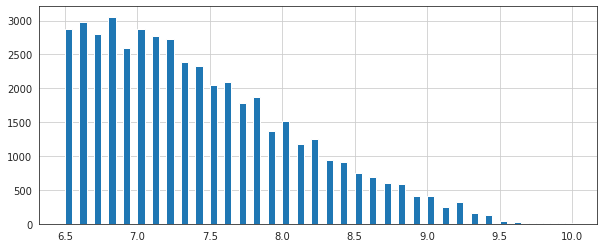

In [0]:
# plot graph of 'num of ratings column' 
plt.figure(figsize =(10, 4)) 
  
movies['averagerating'].hist(bins = 70)